# Fundamentals of Data Analytics - Project

## Loading the Tips Dataset

In [1]:
import seaborn as sns
sns.set(style="darkgrid") 
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")

## Description of the Tips Dataset

The tips dataset is built into the Seaborn python package and is used in the seaborn tutorial for examples of the many plotting features in the seaborn package. 

In [9]:
print('The tips dataset has ' + str(tips.shape[0]) + ' rows and ' + str(tips.shape[1]) + ' columns.')

The tips dataset has 244 rows and 7 columns.


The columns are total_bill, tip, sex, smoker, day, time and size.

In [2]:
cols = tips.columns
cols

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

Each row of the dataset has an entry in the aforementioned columns. The total_bill column is the amount of  money spent on food/beverages. The tip column is the amount of tip given for the total bill. 
The sex column denotes the sex of the person paying the bill. I find this column a little unusual as it's so black and white. There are no instances of a party splitting the bill which is a common occurance.
The day column denotes the day of the week. 
The time column denotes the time of the dining sitting. 
The size column denotes the size of the dining party. 
The smoker column denotes the classification of the dining party as smoking or non smoking. Presumably this means that a member/members of the party was a smoker and the party was seated in the smoking section. This is not clear from the dataset. 

#### Check for missing Data
As you can see below, there is no missing data in the dataset i.e. no Nan or null values.

In [11]:
print(tips.isnull().sum()) # Adapted from https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/ [1]
print(tips.isna().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [48]:
print('The number of total bills is ' + str(tips.total_bill.count()) + ', with ' + str(tips.tip.count()) + ' tips.')
print('The average bill is ' + str(tips.total_bill.mean()) + ' and the average tip is ' + str(tips.tip.mean()))
gender = tips.sex.unique()
print('The \'sex\' of the person paying the bill is classified as ' + gender[0] + ' or ' + gender[1] + '.')
smoker = tips.smoker.unique()
print('The \'smoker\' status of the party is classified as ' + smoker[0] + ' or ' + smoker[1] + '.')

The number of total bills is 244, with 244 tips.
The average bill is 19.785942622950824 and the average tip is 2.9982786885245902
The 'sex' of the person paying the bill is classified as Female or Male.
The 'smoker' status of the party is classified as No or Yes.


In [69]:
days = tips.day.unique()
print('The restaurant is open the following days : ' + days[0] + 'day, ' + days[1] + 'urday, ' + days[2] + 'sday, and ' + days[3] + 'day.')
# Unique Sittings
thur = tips[tips.day == 'Thur']
thur = thur.time.unique()
fri = tips[tips.day == 'Fri']
fri = fri.time.unique()
sat = tips[tips.day == 'Sat']
sat = sat.time.unique()
sun = tips[tips.day == 'Sun']
sun = sun.time.unique()


The restaurant is open the following days : Sunday, Saturday, Thursday, and Friday.


With the following sittings :

| Sitting | Thursday | Friday | Saturday | Sunday | 
|---------|----------|--------|----------|--------| 
| Lunch   | X        | X      |          |        | 
| Dinner  | X        | X      | X        | X      | 

In [32]:
means = tips.groupby('day').mean() # Adapted from https://www.youtube.com/watch?foo=bar&v=_T8LGqJtuGc , Wes McKinney: pandas in 10 minutes | Walkthrough [2]
means # The mean total_bill, tip and size grouped by day

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


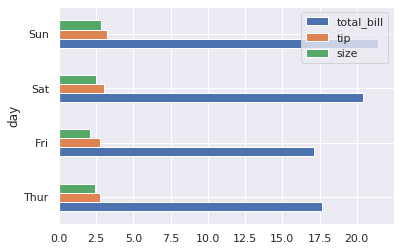

In [33]:
means.plot.barh(); # Adapted from Reference [2] . Horizontal bar plot of mean total_bill, tip and size by day.

In [35]:
means_by_sitting = tips.groupby(['day','time']).mean() # Adapted from Reference [2]
means_by_sitting #  mean total_bill, tip and size grouped by day and time

total_bill       tip      size
day  time                                  
Thur Lunch    17.664754  2.767705  2.459016
     Dinner   18.780000  3.000000  2.000000
Fri  Lunch    12.845714  2.382857  2.000000
     Dinner   19.663333  2.940000  2.166667
Sat  Lunch          NaN       NaN       NaN
     Dinner   20.441379  2.993103  2.517241
Sun  Lunch          NaN       NaN       NaN
     Dinner   21.410000  3.255132  2.842105

As you can see from the table above, there were no lunch sittings on Saturday or Sunday. 

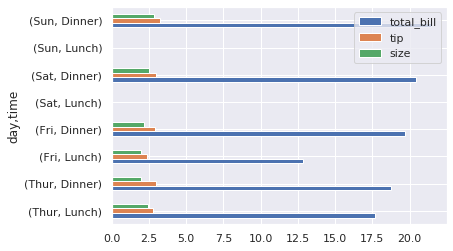

In [37]:
means_by_sitting.plot.barh(); # Horizontal bar plot of  mean total_bill, tips and size grouped by day and time.

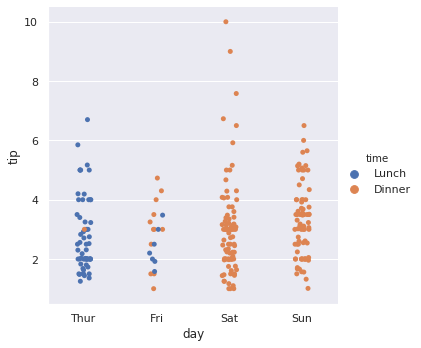

In [70]:
sns.catplot(x="day", y="tip",hue="time", data=tips);

In [11]:
sexes = tips.sex.unique()
sexes

[Female, Male]
Categories (2, object): [Female, Male]

In [102]:
tips['size'].min()

1

In [103]:
tips['size'].max()

6

In [104]:
tips['size'].unique()

array([2, 3, 4, 1, 6, 5])

In [28]:
tips.tip.max()

10.0

In [29]:
tips.tip.min()

1.0

In [30]:
tips.total_bill.min()

3.07

In [31]:
tips.total_bill.max()

50.81

In [12]:
# Total tips as a % of all bills
(tips.tip.sum()/tips.total_bill.sum())*100

15.153580224410025

In [13]:
# Make a new column with % of tip/bill size
tips['Tipped Percent'] = (tips.tip/tips.total_bill)*100

In [14]:
tips['Tipped Percent'].describe()

count    244.000000
mean      16.080258
std        6.107220
min        3.563814
25%       12.912736
50%       15.476977
75%       19.147549
max       71.034483
Name: Tipped Percent, dtype: float64

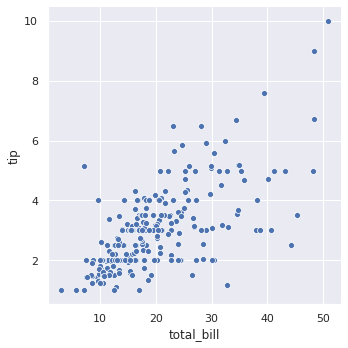

In [20]:
sns.relplot(x="total_bill", y="tip", data=tips);

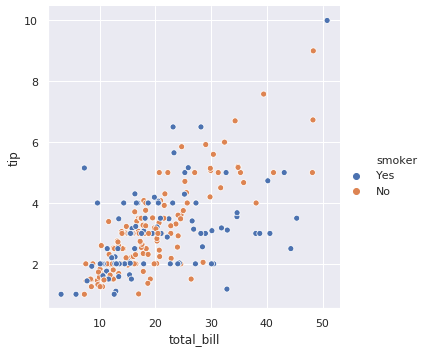

In [40]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

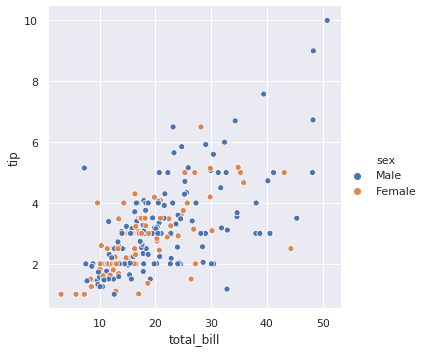

In [41]:
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips);

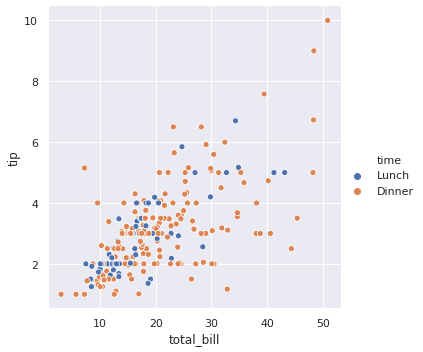

In [42]:
sns.relplot(x="total_bill", y="tip", hue="time", data=tips);

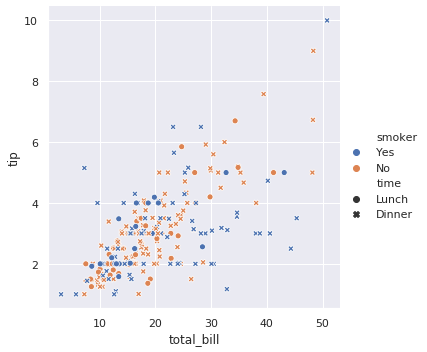

In [43]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

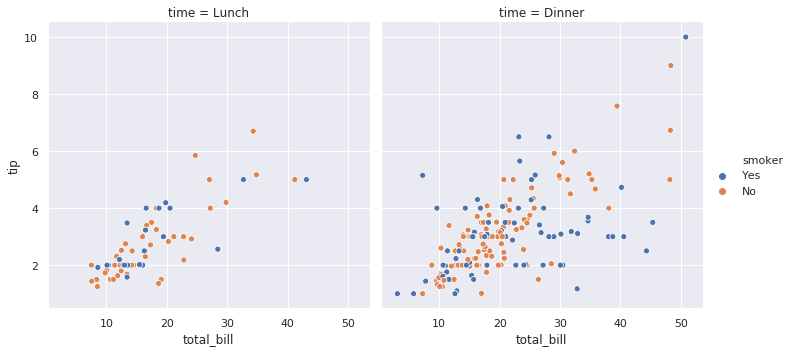

In [44]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

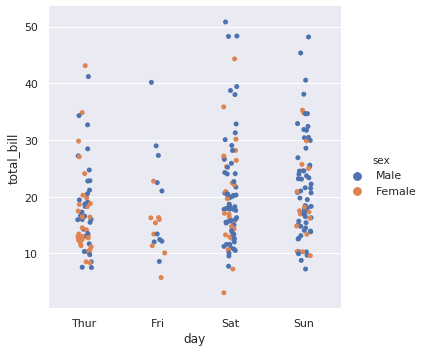

In [53]:
sns.catplot(x="day", y="total_bill",hue="sex", data=tips);

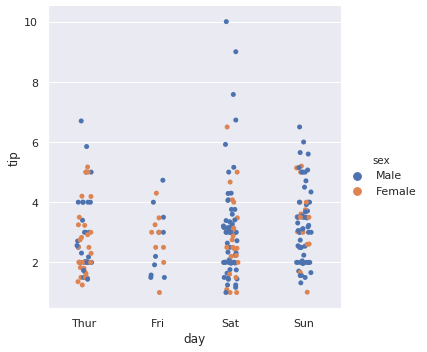

In [52]:
sns.catplot(x="day", y="tip",hue="sex", data=tips);

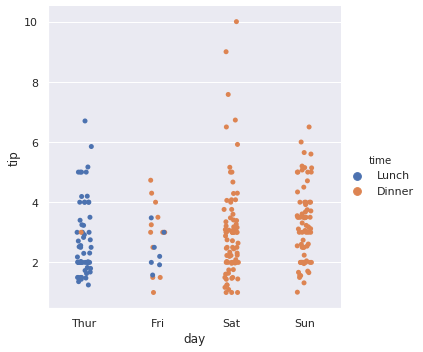

In [54]:
sns.catplot(x="day", y="tip",hue="time", data=tips);

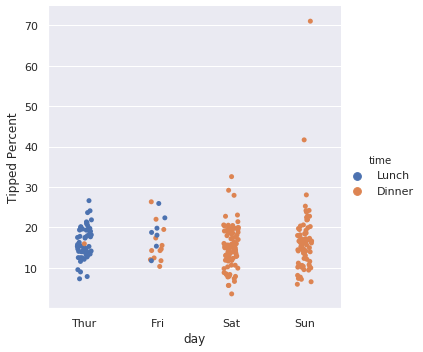

In [105]:
sns.catplot(x="day", y="Tipped Percent",hue="time", data=tips);

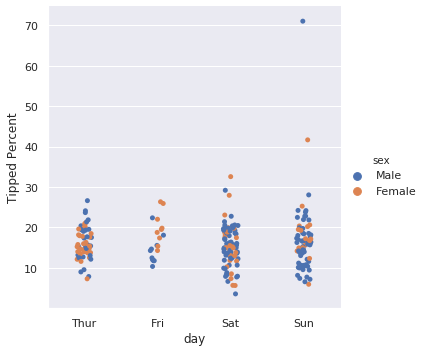

In [106]:
sns.catplot(x="day", y="Tipped Percent",hue="sex", data=tips);

## Grouped by Sittings

In [62]:
thursday = tips[tips.day == 'Thur']
thursday_lunch = thursday[thursday.time == 'Lunch']
thursday_dinner = thursday[thursday.time == 'Dinner']
friday = tips[tips.day == 'Fri']
friday_lunch = friday[friday.time == 'Lunch']
friday_dinner = friday[friday.time == 'Dinner']
saturday = tips[tips.day == 'Sat']
saturday_lunch = saturday[saturday.time == 'Lunch']
satuday_dinner = saturday[saturday.time == 'Dinner']
sunday = tips[tips.day == 'Sun']
sunday_lunch = sunday[sunday.time == 'Lunch']
sunday_dinner = sunday[sunday.time == 'Dinner']

## References

[1] https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/

[2] Wes McKinney: pandas in 10 minutes | Walkthrough - https://www.youtube.com/watch?foo=bar&v=_T8LGqJtuGc